In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/FM2023.csv")
df = df.sort_values(by='ca',ascending=False)
df.head(10)

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,...,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
0,Kevin De Bruyne,M/AM RLC,31,189,189,Belgium,Manchester City,14,19,15,...,9400,Northern_European,181,4,1991/6/28,91,24,394372.0,NaN,18004457
1,Kylian Mbappé,AM/S RL,23,188,197,France,Paris Saint-Germain,13,13,18,...,9248,African_Caribbean,172,13,1998/12/20,57,27,1035616.0,NaN,85139014
2,Robert Lewandowski,S,33,186,190,Poland,Barcelona,3,8,13,...,9250,Northern_European,183,3,1988/8/21,132,76,345204.0,NaN,719601
3,Erling Haaland,S,22,185,195,"Norway,England",Manchester City,7,10,14,...,8750,Northern_European,185,2,2000/7/21,21,20,394372.0,NaN,29179241
4,Mohamed Salah,AM/S RL,30,185,187,Egypt,Liverpool,12,14,17,...,8750,North_African__Middle_Eastern,181,9,1992/6/15,85,47,405971.0,NaN,98028755
5,Karim Benzema,S,34,185,185,"France,Algeria",R. Madrid,10,13,16,...,8750,North_African__Middle_Eastern,183,9,1987/12/19,97,37,321918.0,NaN,8435089
6,Harry Kane,S C,28,183,185,"England,Republic of Ireland",Tottenham Hotspur,9,15,14,...,8750,Northern_European,183,4,1993/7/28,73,50,231983.0,NaN,28049320
7,Thibaut Courtois,GK,30,181,181,Belgium,R. Madrid,6,1,10,...,8500,Northern_European,178,2,1992/5/11,94,0,296047.0,NaN,18026122
8,Virgil van Dijk,D C,31,181,183,"Holland,Suriname",Liverpool,3,5,13,...,8500,African_Caribbean,182,14,1991/7/8,47,5,278380.0,NaN,37024025
9,Lionel Messi,AM/S RC,35,180,200,"Argentina,Spain",Paris Saint-Germain,15,15,20,...,9267,Mediterranean_Hispanic,172,3,1987/6/24,162,86,776712.0,NaN,7458500


In [3]:
df.shape

(8452, 98)

In [4]:
df.dtypes

Name                                    object
Position                                object
Age                                      int64
ca                                       int64
pa                                       int64
                                        ...   
Number of national team appearances      int64
Goals scored for the national team       int64
Salary                                 float64
Rental club                             object
UID                                      int64
Length: 98, dtype: object

In [5]:
df['Club'].fillna('No club', inplace=True)
df.isna().sum()

Name                                      0
Position                                  0
Age                                       0
ca                                        0
pa                                        0
                                       ... 
Number of national team appearances       0
Goals scored for the national team        0
Salary                                  107
Rental club                            7457
UID                                       0
Length: 98, dtype: int64

In [6]:
df = df.rename(columns={"Number of national team appearances":'IntCaps','Goals scored for the national team': 'IntGoals'})

In [7]:
# byclub = df.groupby('Club')
# age = df.groupby('Age').agg({"IntCaps": "sum", "IntGoals": "sum"}).reset_index()
age = df.groupby(['Age'])
age

In [8]:
age[['IntCaps', 'IntGoals']].describe()

IntCaps                                                             \
      count        mean        std    min    25%    50%     75%    max   
Age                                                                      
15     15.0    0.000000   0.000000    0.0    0.0    0.0    0.00    0.0   
16    271.0    0.003690   0.060746    0.0    0.0    0.0    0.00    1.0   
17    378.0    0.031746   0.519179    0.0    0.0    0.0    0.00   10.0   
18    449.0    0.160356   1.013805    0.0    0.0    0.0    0.00   12.0   
19    458.0    0.633188   2.586100    0.0    0.0    0.0    0.00   22.0   
20    486.0    0.930041   3.051997    0.0    0.0    0.0    0.00   25.0   
21    542.0    1.583026   4.648806    0.0    0.0    0.0    0.00   36.0   
22    574.0    2.583624   6.025178    0.0    0.0    0.0    1.00   42.0   
23    502.0    4.249004   8.565804    0.0    0.0    0.0    5.00   57.0   
24    446.0    6.051570  10.472845    0.0    0.0    0.0    7.00   58.0   
25    504.0    7.712302  13.260000    0.0    0.0    0.0   11.00   83.0   
26    442.0   10.201357  15.134250    0.0    0.0    1.0   17.00   75.0   
27    497.0   10.802817  16.786412    0.0    0.0    0.0   18.00   78.0   
28    488.0   12.147541  19.384861    0.0    0.0    1.0   18.00  122.0   
29    482.0   13.379668  20.136309    0.0    0.0    2.0   21.00  104.0   
30    402.0   17.808458  26.007972    0.0    0.0    3.0   28.75  119.0   
31    377.0   17.835544  26.239983    0.0    0.0    4.0   29.00  160.0   
32    335.0   19.062687  28.526471    0.0    0.0    2.0   30.50  117.0   
33    269.0   21.330855  32.573428    0.0    0.0    3.0   30.00  148.0   
34    183.0   26.284153  38.198385    0.0    0.0    6.0   43.00  151.0   
35    161.0   31.534161  42.257400    0.0    0.0   10.0   56.00  175.0   
36     82.0   41.170732  46.657090    0.0    2.0   26.0   61.00  180.0   
37     55.0   37.363636  42.235391    0.0    3.0   20.0   57.50  189.0   
38     22.0   27.772727  37.895762    0.0    0.0    6.5   47.00  114.0   
39     15.0   54.533333  48.641350    0.0   13.0   39.0   83.50  143.0   
40      7.0   31.857143  45.171630    0.0    0.5    5.0   48.00  121.0   
41      7.0   31.285714  43.434680    0.0    0.0    0.0   54.00  111.0   
42      2.0    1.000000   1.414214    0.0    0.5    1.0    1.50    2.0   
44      1.0  176.000000        NaN  176.0  176.0  176.0  176.00  176.0   

    IntGoals                                                   
       count      mean        std  min  25%  50%   75%    max  
Age                                                            
15      15.0  0.000000   0.000000  0.0  0.0  0.0  0.00    0.0  
16     271.0  0.000000   0.000000  0.0  0.0  0.0  0.00    0.0  
17     378.0  0.002646   0.051434  0.0  0.0  0.0  0.00    1.0  
18     449.0  0.011136   0.124502  0.0  0.0  0.0  0.00    2.0  
19     458.0  0.041485   0.311036  0.0  0.0  0.0  0.00    4.0  
20     486.0  0.082305   0.460183  0.0  0.0  0.0  0.00    4.0  
21     542.0  0.167897   0.929812  0.0  0.0  0.0  0.00   12.0  
22     574.0  0.379791   1.671653  0.0  0.0  0.0  0.00   21.0  
23     502.0  0.509960   2.051945  0.0  0.0  0.0  0.00   27.0  
24     446.0  0.621076   1.849969  0.0  0.0  0.0  0.00   20.0  
25     504.0  0.922619   2.919729  0.0  0.0  0.0  0.00   39.0  
26     442.0  1.047511   2.748738  0.0  0.0  0.0  1.00   24.0  
27     497.0  1.456740   4.181208  0.0  0.0  0.0  1.00   46.0  
28     488.0  1.473361   4.297856  0.0  0.0  0.0  1.00   50.0  
29     482.0  1.576763   4.490614  0.0  0.0  0.0  1.00   68.0  
30     402.0  2.584577   7.114949  0.0  0.0  0.0  2.00   74.0  
31     377.0  2.620690   6.987215  0.0  0.0  0.0  2.00   82.0  
32     335.0  2.241791   6.251087  0.0  0.0  0.0  1.00   45.0  
33     269.0  2.743494   8.099498  0.0  0.0  0.0  1.00   76.0  
34     183.0  3.382514   7.696590  0.0  0.0  0.0  3.00   52.0  
35     161.0  4.571429  11.814564  0.0  0.0  0.0  4.00   86.0  
36      82.0  5.085366  11.262525  0.0  0.0  0.0  3.75   63.0  
37      55.0  5.927273  16.502362  

In [9]:
age[['IntCaps', 'IntGoals']].max()

,IntCaps,IntGoals
Age,,
15,0,0
16,1,0
17,10,1
18,12,2
19,22,4
20,25,4
21,36,12
22,42,21
23,57,27


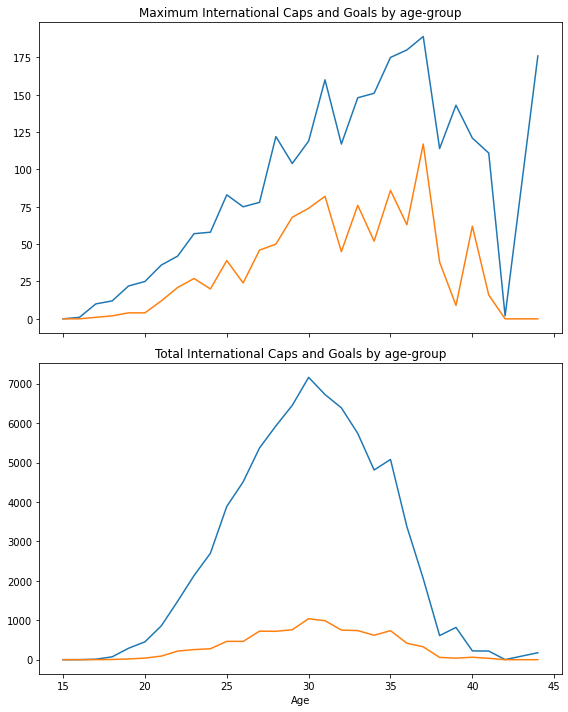

In [10]:
f, axarr = plt.subplots(2, sharex=True, figsize=(8,10))

international_max = age[['IntCaps', 'IntGoals']].max()
axarr[0].plot(international_max)
axarr[0].set_title('Maximum International Caps and Goals by age-group')

international_sum = age[['IntCaps', 'IntGoals']].sum()
axarr[1].plot(international_sum)
axarr[1].set_title('Total International Caps and Goals by age-group')
axarr[1].set_xlabel("Age")
plt.tight_layout()

In [14]:
goals_max = international_max['IntGoals']
x = []
for value, dataframe in age:
    if goals_max[value] > 0:
        players = dataframe[dataframe.IntGoals == goals_max[value]]['Name'].values
        goals = goals_max[value]
        print(value, players, goals)

17 ['Gavi'] 1
18 ['Lamine Camara'] 2
19 ['Giovanni Reyna'] 4
20 ['Bukayo Saka' 'Armando Broja' 'Dango Ouattara' 'El Bilal Touré'
 'Troy Parrott'] 4
21 ['Alphonso Davies'] 12
22 ['Jonathan David'] 21
23 ['Kylian Mbappé'] 27
24 ['Lautaro Martínez'] 20
25 ['Almoez Ali'] 39
26 ['Timo Werner'] 24
27 ['Aleksandar Mitrović'] 46
28 ['Harry Kane'] 50
29 ['Romelu Lukaku'] 68
30 ['Neymar'] 74
31 ['Ali Mabkhout'] 82
32 ['Andriy Yarmolenko'] 45
33 ['Robert Lewandowski'] 76
34 ['Chicharito'] 52
35 ['Lionel Messi'] 86
36 ['Edin Džeko'] 63
37 ['Cristiano Ronaldo'] 117
38 ['Paolo Guerrero'] 38
39 ['Fabio Quagliarella' 'Atiba Hutchinson'] 9
40 ['Zlatan Ibrahimović'] 62
41 ['Maxi Rodríguez'] 16
